 Тестирование приложений на Python помощью PyTest

Тестирование программного обеспечения — это один из самых важных инструментов программной инженерии. В процессе тестирования выполняется поиск ошибок в коде и проверка работоспособности программы. Обеспечить стабильную работу приложений без тестирования практически невозможно.

Сейчас самой популярной библиотекой для разработки тестов для программ на Python является библиотека PyTest. Она позволяет быстро и просто разрабатывать тесты, а также автоматически находить код с тестами.

Перед использованием библиотеки PyTest ее нужно установить с помощью pip:

pip install pytest

РАЗРАБОТКА ТЕСТОВ С ИСПОЛЬЗОВАНИЕМ PYTEST

Тесты в PyTest создаются в виде отдельных функций, в название которых включено слово test. Давайте рассмотрим простой пример создания теста для функции, которая выполняет сложение двух чисел.

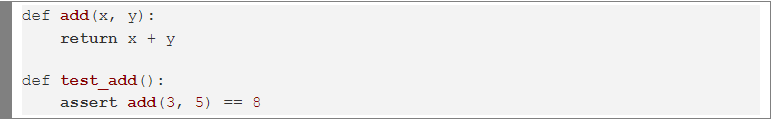

Здесь мы определяем две функции:

Функция add, которая получает на вход два аргумента x и y, а на выход выдает их сумму.

Функция test_add, которая содержит код теста для функции add. В этой функции мы используем оператор assert Python, который выполняет проверку условия. Условие сконструировано следующим образом. Вызываем функцию add, работоспособность которой нам нужно проверить, передаем в нее два параметра: 3 и 5. Результат работы функции сравниваем с значение 8.

Оператор assert в Python работает просто: он выполняет проверку условного выражения (в примере условие add(3, 5) == 8) и если выражение истинно, то не происходит ничего, а если выражение ложно, то программа останавливается с ошибкой.

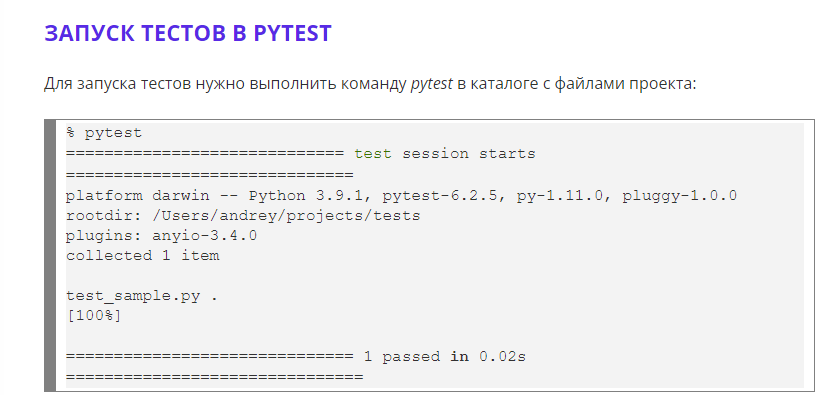

PyTest автоматически ищет код с тестами следующим образом:

Тестами считаются функции, название которых начинается с test (в нашем примере это функция test_add).

Файлы с названиями test_*.py или *_test.py считаются полностью содержащими тесты.

Таким образом, при запуске PyTest нет необходимости указывать, какие тесты нужно запустить. Будут автоматически запущены все тесты, которые созданы с учетом указанных выше правил.


В примере был запущен один тест, который выполнился успешно. Давате посмотрим, что произойдет, если в процессе теста возникнет ошибка. Для этого изменим код функции add, чтобы в ней была ошибка:

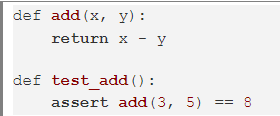

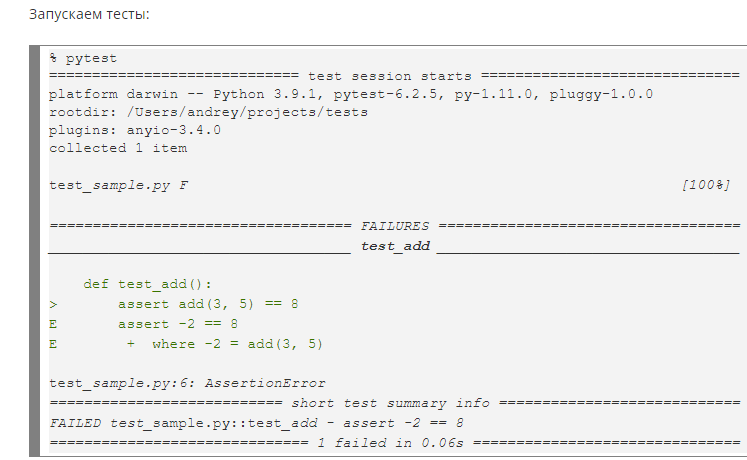

В этот раз мы видим, что тесты завершены безуспешно (failed). Указано, какой именно тест не выполнился (в функции test_add) и какое значение условия (assert -2 == 8). Проблема с тестом вызвана ошибкой в функции add: мы ожидаем, что функция add вернет значение 8, а она вернула значение -2. Таким образом, тест позволил нам определить, что функция add работает неправильно.

ИТОГИ:

Тестирование программного обеспечения позволяет обнаружить в нем ошибки и удостовериться в правильности результатов работы программы.

В Python для тестирования используется библиотека PyTest.

Тесты в PyTest создаются в функциях, название которых начинается на test, или в файлах, название которых начинается или заканчивается на test.

В тестах используется оператор assert Python, который выполняет проверку условия и, в случае ложного результата, завершает программу с ошибкой.

Запуск тестов выполняется с помощью команды pytest.

Давайте рассмотрим, как можно применить библиотеку PyTest для тестирования созданной вами ранее приложения API предварительно обученной модели машинного обучения. Сложность тестирования API заключается в том, что для работы такого приложения необходимо запускать веб-сервер, а взаимодействие с ним осуществляется по сетевым протоколам с помощью инструментов curl, Postman или аналогичных. Однако в библиотеу FastAPI встроен инструмент для тестирования API с использованием PyTest, который называется TestClient. Давайте рассмотрим, как его использовать для тестирования API.

В крупных проектах код тестов рекомендуется отделять от кода приложения для удобства понимания и сопровождения. Поэтому мы не будем добавлять код теста в файл main.py, который содержит код приложения API, а создадим для этого отдельный файл test_main.py. Название файла начинается с test, поэтому библиотека PyTest поймет, что в этом файле расположены тесты.

В файл test_main.py добавим следующее:

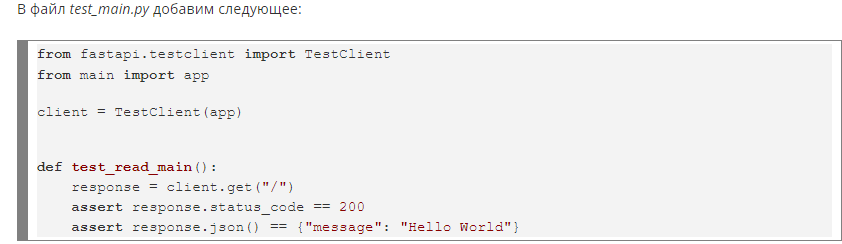

В первой строке подключается TestClient — клиент для тестрования API из FastAPI.

image.png

Во второй строке мы импортируем объект app класса FastAPI из файл main.py в текущем каталоге. Именно в файле main.py содержится код приложения API для модели машинного обучения.

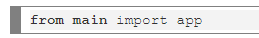

После этого создается клиент для тестирования, которому при создании передается объект API app, тестирование которого необходимо выполнить

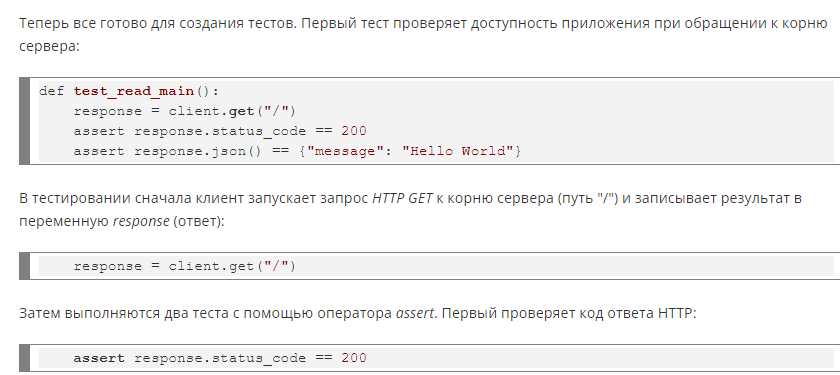

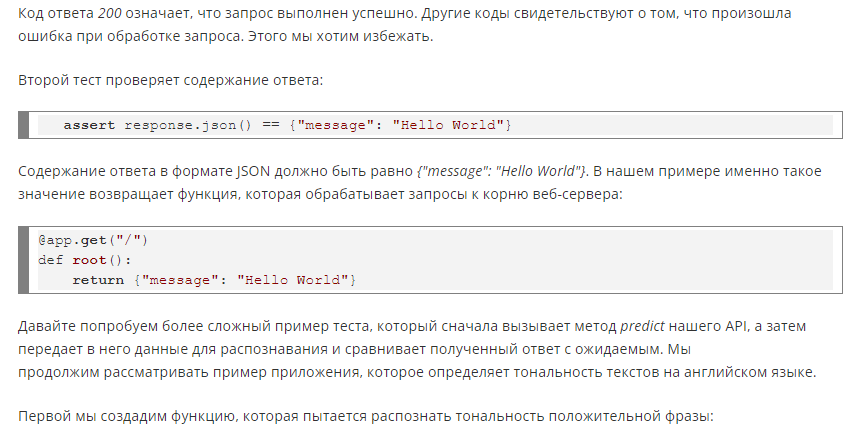

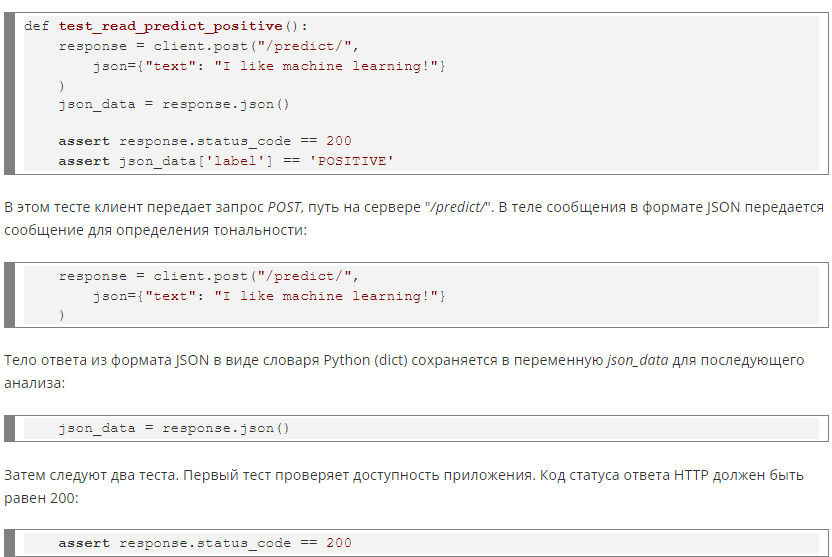

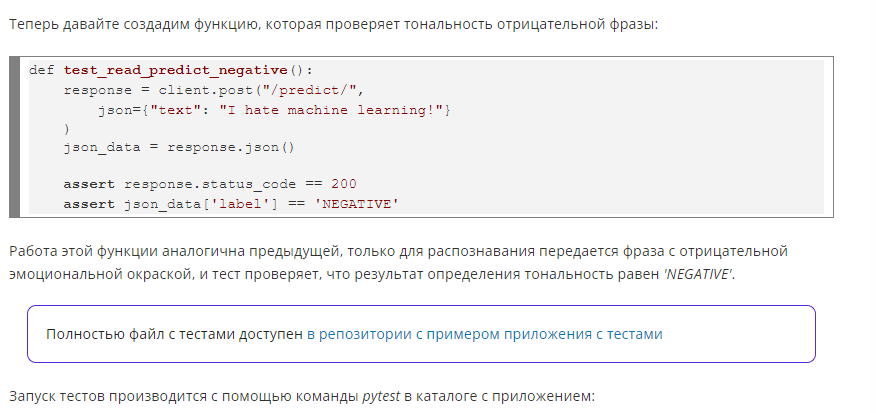

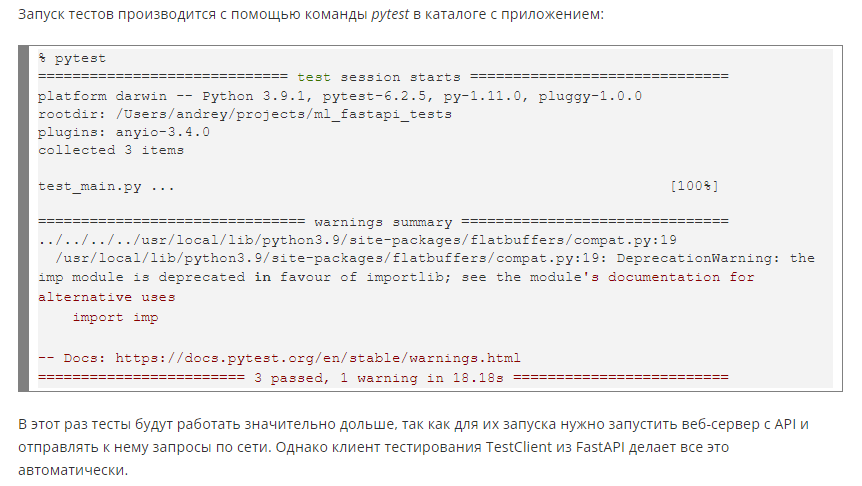

В этот раз тесты будут работать значительно дольше, так как для их запуска нужно запустить веб-сервер с API и отправлять к нему запросы по сети. Однако клиент тестирования TestClient из FastAPI делает все это автоматически.

В результате выполнения теста видно, что все три теста прошли успешно. Есть одно предупреждение, но в данном примере его можно игнорировать.

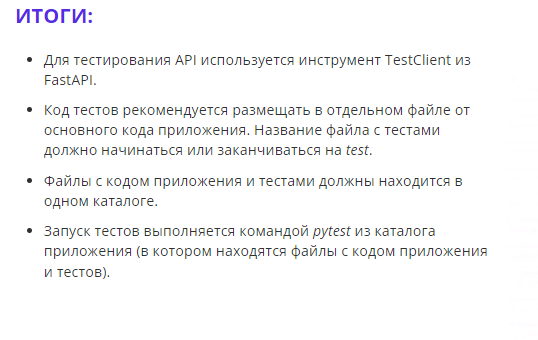

#Continuous Integration и GitHub Actions

Мы научились создавать тесты для программ на Python, в том числе для тестирования API. Однако, чтобы находить ошибки в программах, тесты должны проводиться регулярно, иначе они будут бесполезны. Кто и когда должен запускать тесты, чтобы ошибки находились как можно раньше?

Для решения этой задачи в программной инженерии используется практика, которая называется Continuous Integration (CI, в переводе «непрерывная интеграция», но этот термин почти никто не использует). Техника CI заключается в том, что разработчики должны часто обновлять код в разделяемом репозитории (например, на GitHub), и при каждом обновлении должны автоматически запускаться тесты для проверки корректности внесенных изменений. К примеру, тесты могут запускаться при выполнении каждого коммита в репозиторий.

Сейчас существует большое количество инструментов CI, например, Jenkins, TeamCity, CircleCI. Крупные облачные платформы предоставляют свои сервисы CI: AWS CodePipeline, Azure Pipelines, CI/CD on Google Cloud. Мы рассмотрим, как использовать инструменты CI GitHub Actions, т.к. они бесплатны и для их использования в репозитории на GitHub не нужно ничего дополнительно устанавливать и настраивать.

НАСТРОЙКА GITHUB ACTIONS ДЛЯ РЕПОЗИТОРИЯ

Для того, чтобы настроить Continuous Integration для репозитория GitHub с помощью GitHub Actions, нужно перейти на вкладку «Actions» в репозитории:



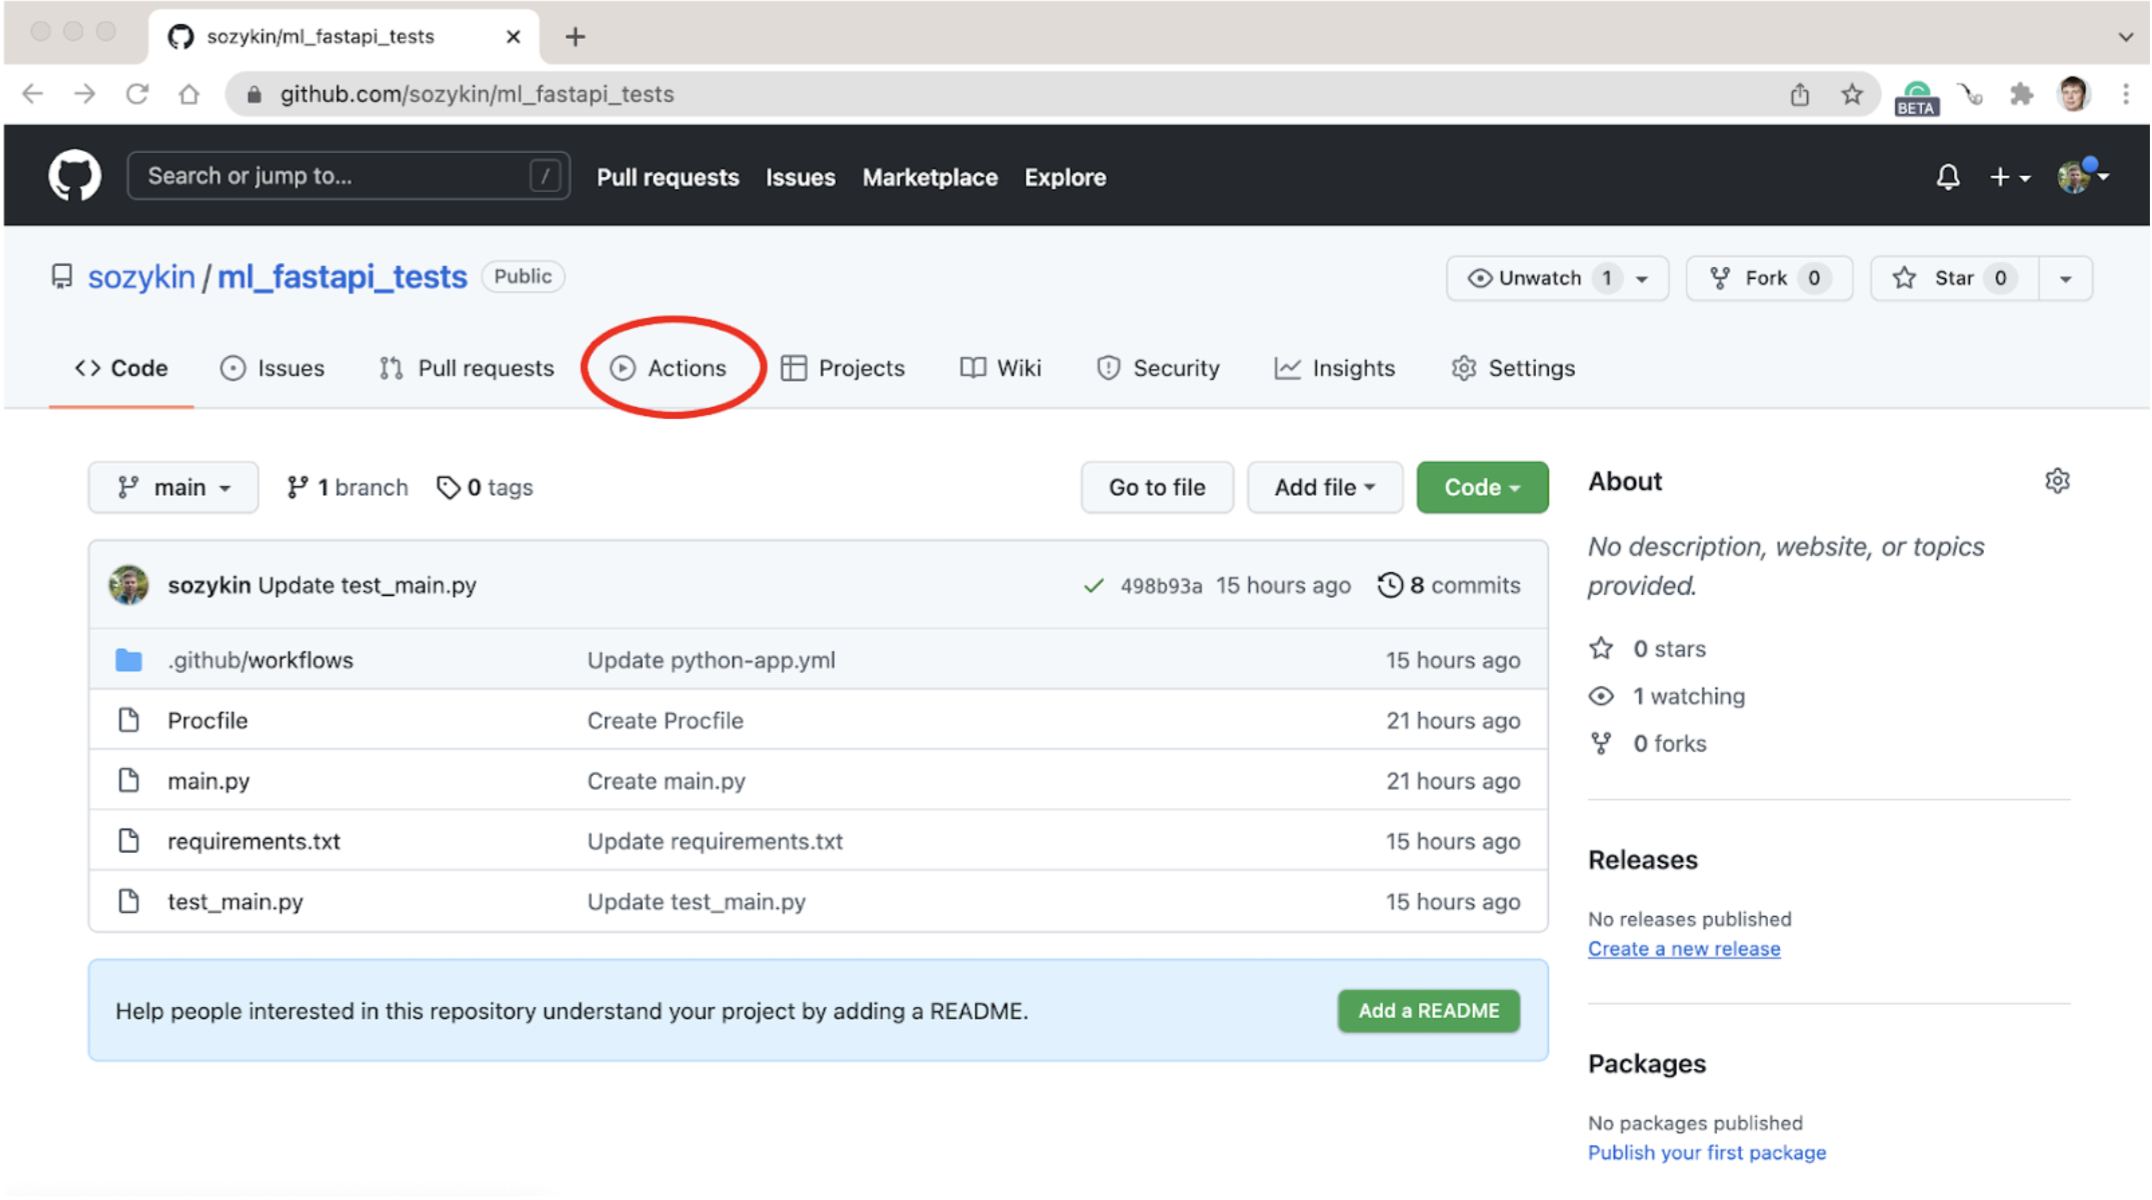

Переход к настройкам GitHub Actions для репозитория на GitHub

Во вкладке GitHub Actions будет предложено выбрать тип потока работ («workflow») для реализации CI. GitHub определил, что приложение написано на Python, и поэтому предлагает несколько вариантов потоков работ для Python. Выбираем вариант «Python application» — приложение на Python без каких-либо дополнительных инструментов.



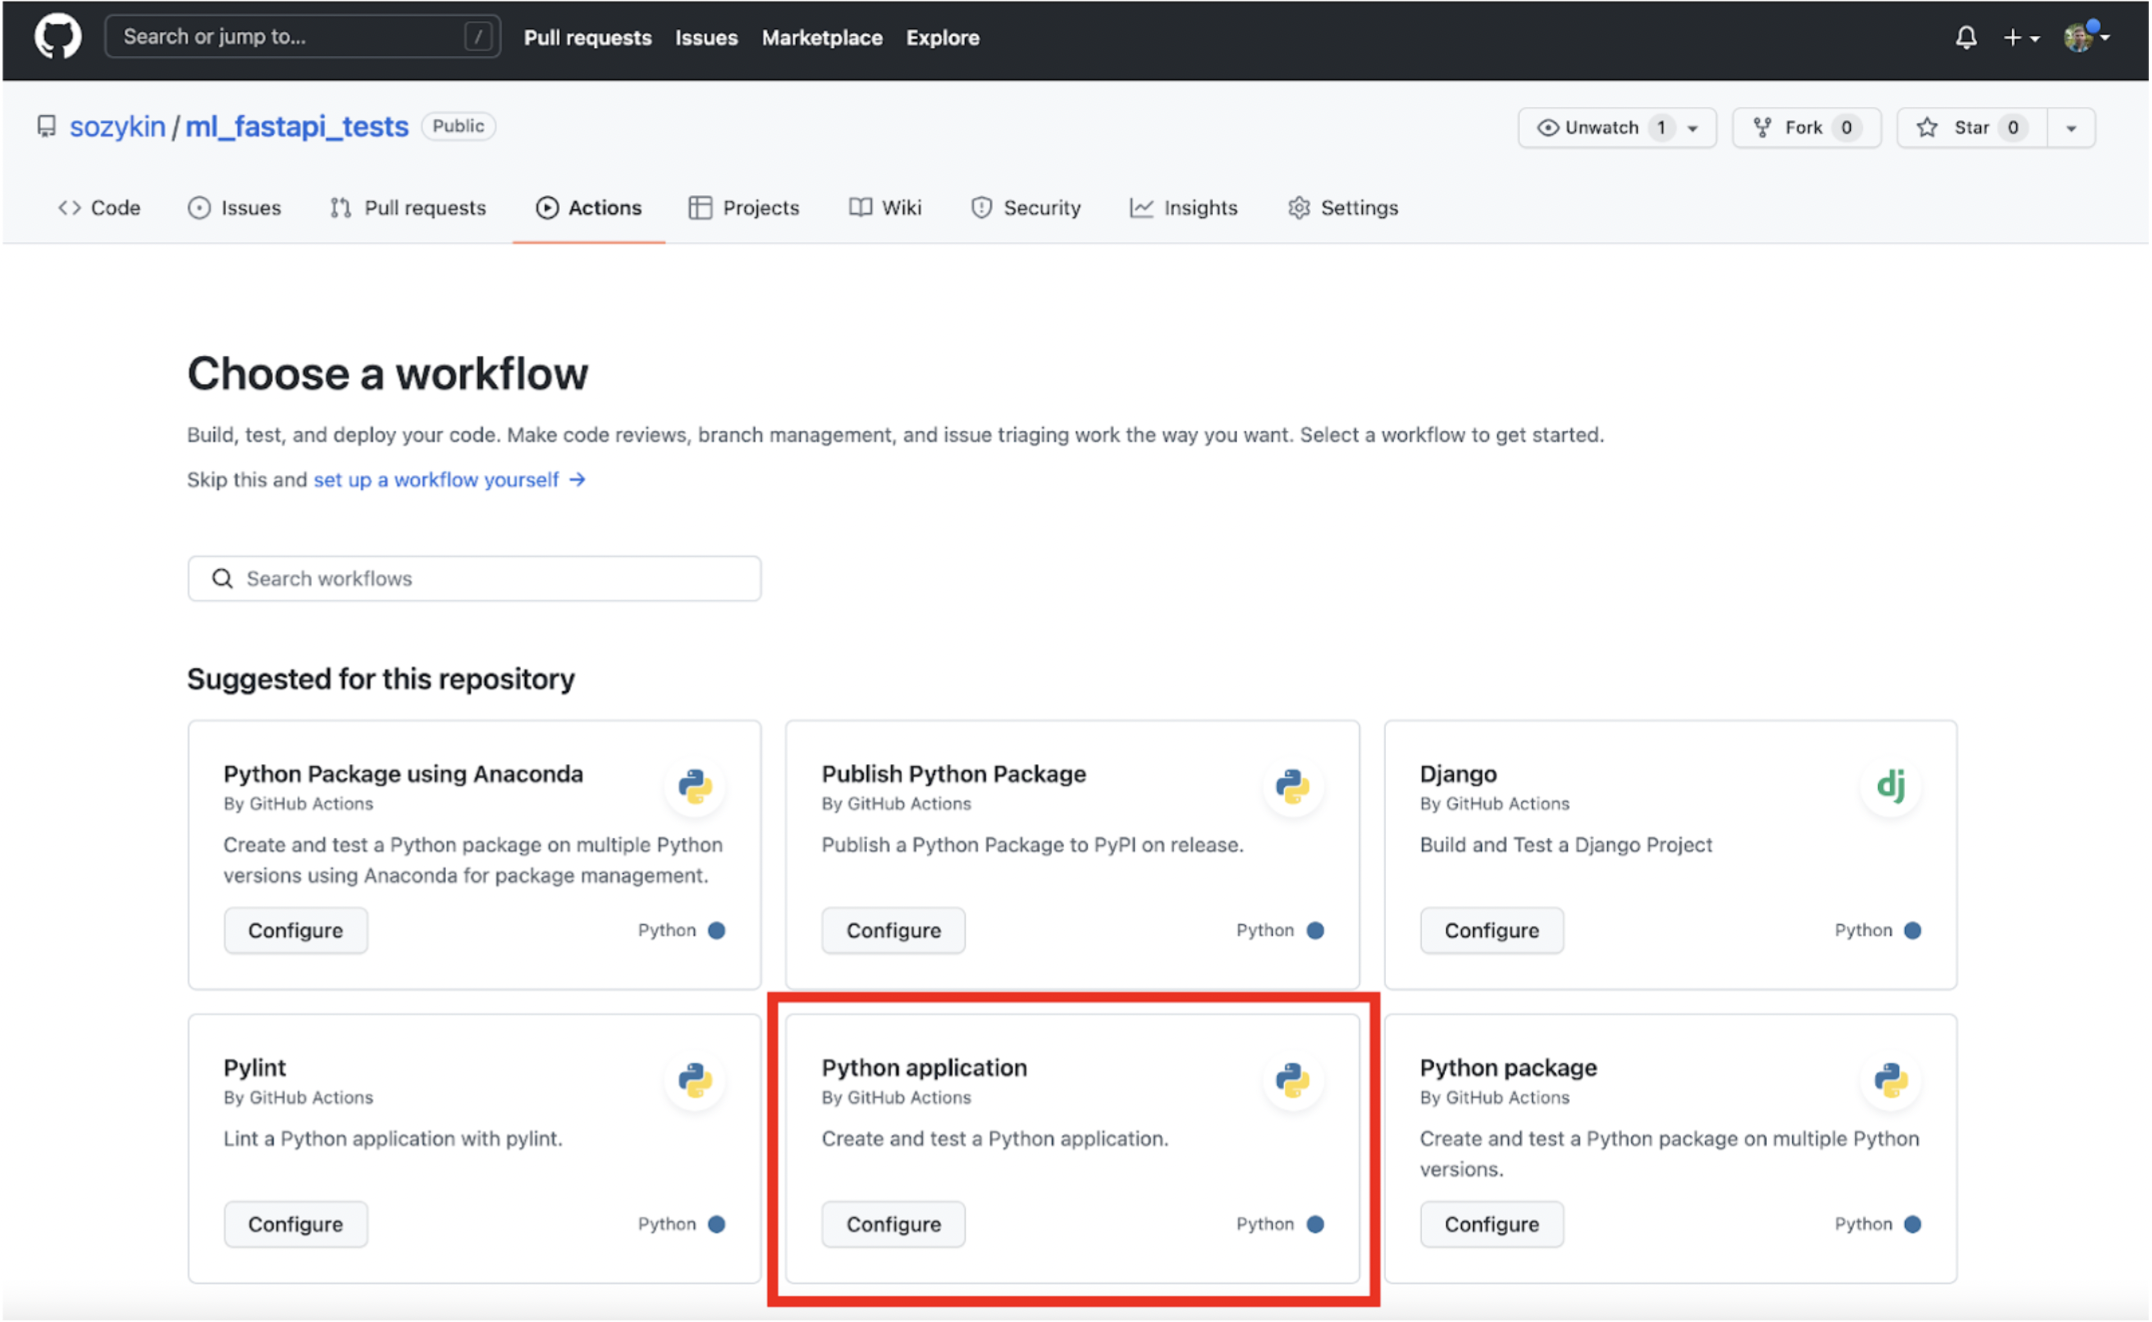

После выбора типа потока работ откроется окно с шаблоном файла описания потока работ:

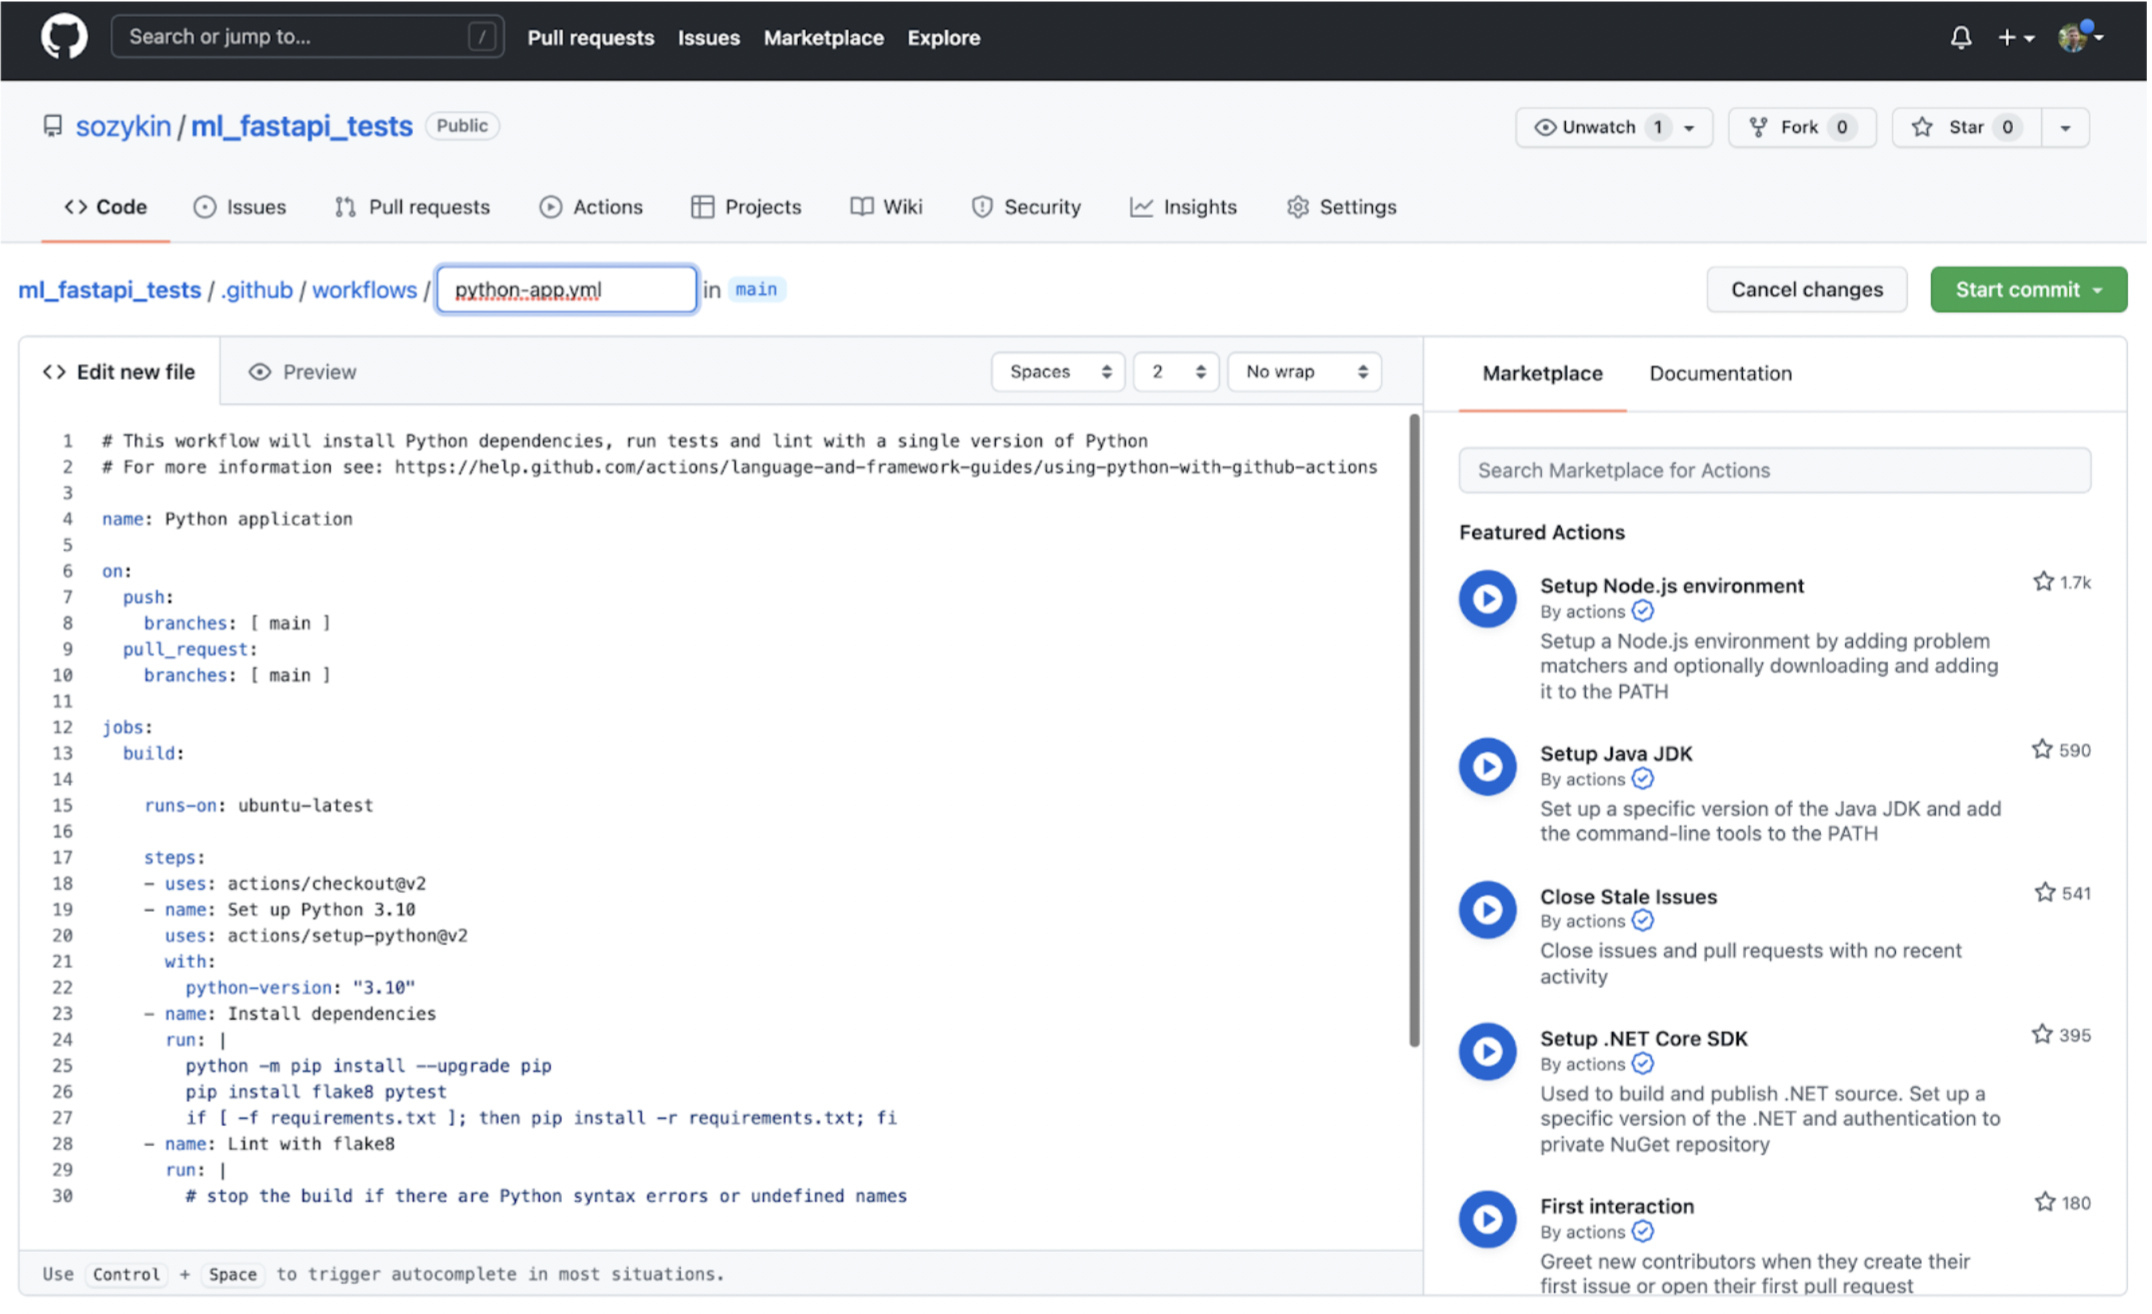

Файл описания потока работ рекомендуется оставить без изменений. Нужно только поменять версию Python c 3.10 на 3.9. Измененный файл будет выглядеть следующим образом:

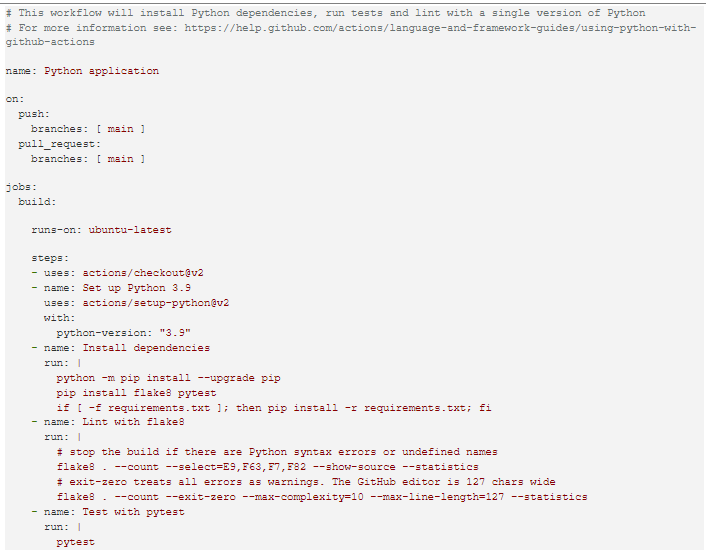

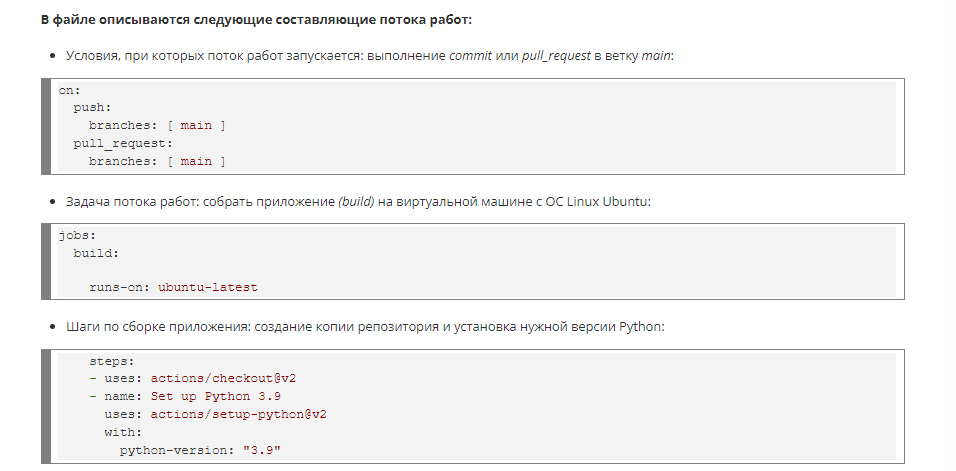

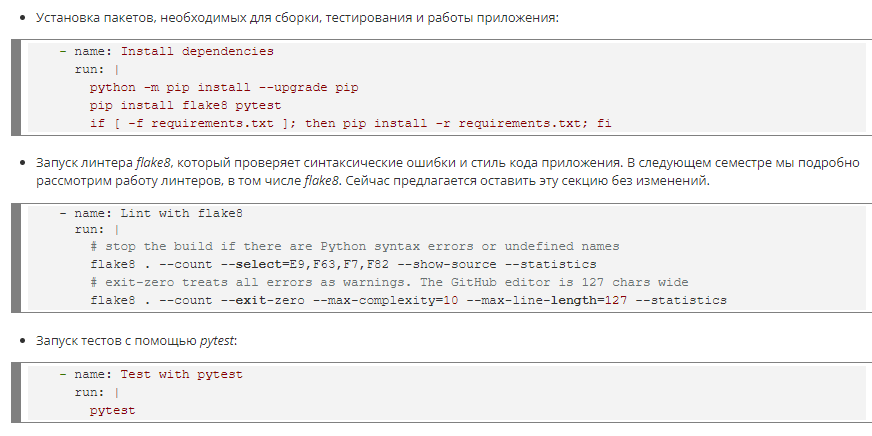

Как мы рассматривали в предыдущих юнитах, для запуска тестов используется одна команда pytest. Она автоматически находит код тестов по именам файлов или функций.

Файл с описанием потока работ CI хранится в репозитории на GitHub в каталоге .github/workflows. Если в репозитории есть такой файл, после каждого коммита в репозиторий GitHub будет создавать виртуальную машину. В ней будет установлен Python и другое необходимое программное обеспечение, указанное в описании потока работ и файле requirements.txt, а затем будут запущены линтер и тесты. Результаты работы можно увидеть на вкладке «Actions».

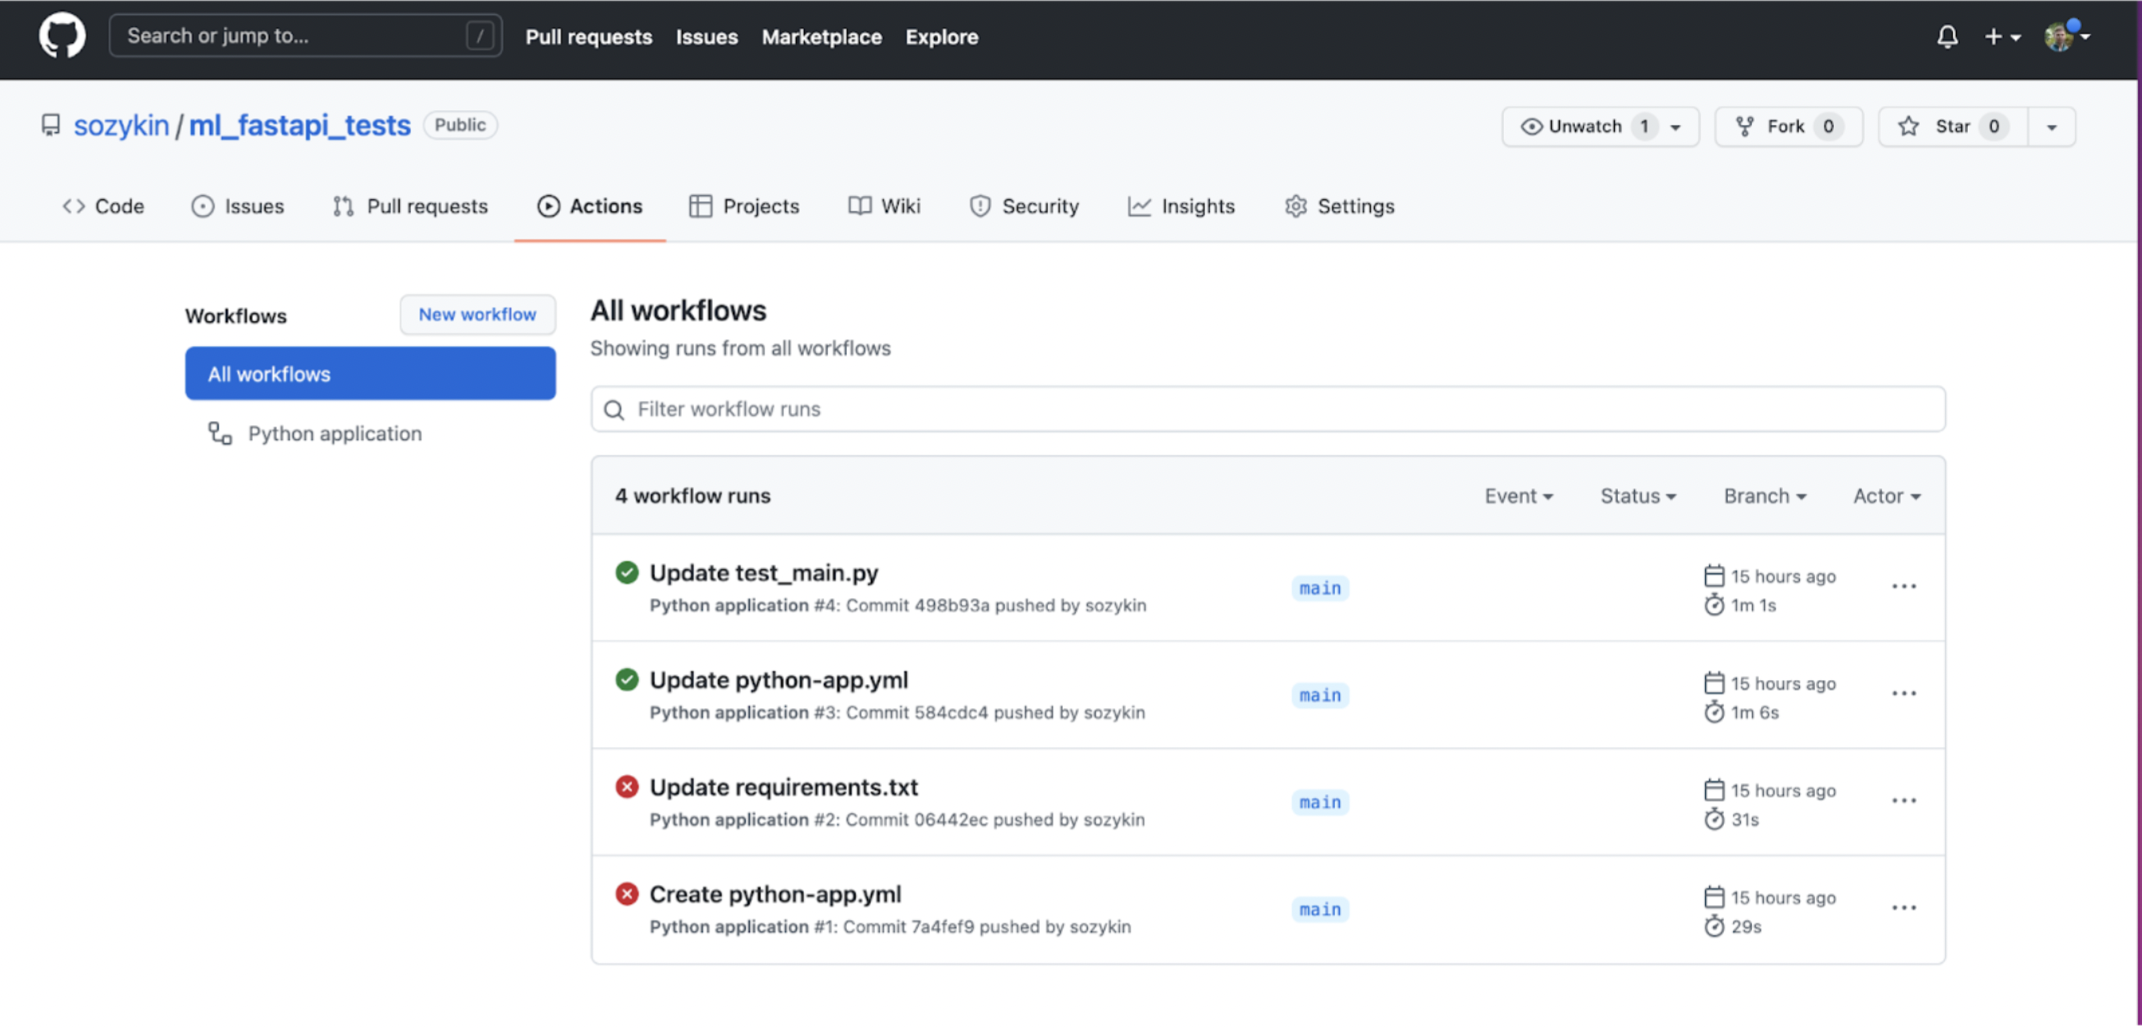

Успешно выполненные потоки работ отмечены зеленой галочкой. Красным крестиком отмечены потоки, в которых произошли ошибки при выполнении, например, в тестах. Рядом с каждым запуском потока работ указывается, каким коммитом он был вызван. Поэтому всегда можно определить, какие изменения в коде привели к ошибкам в сборке.

Посмотреть результаты запуска и причины ошибок можно, щелкнув на название потока работ. Вот пример окна сборки приложения в репозитории https://github.com/sozykin/ml_fastapi_tests/ с результатами запуска тестов, которые мы рассмотрели ранее.



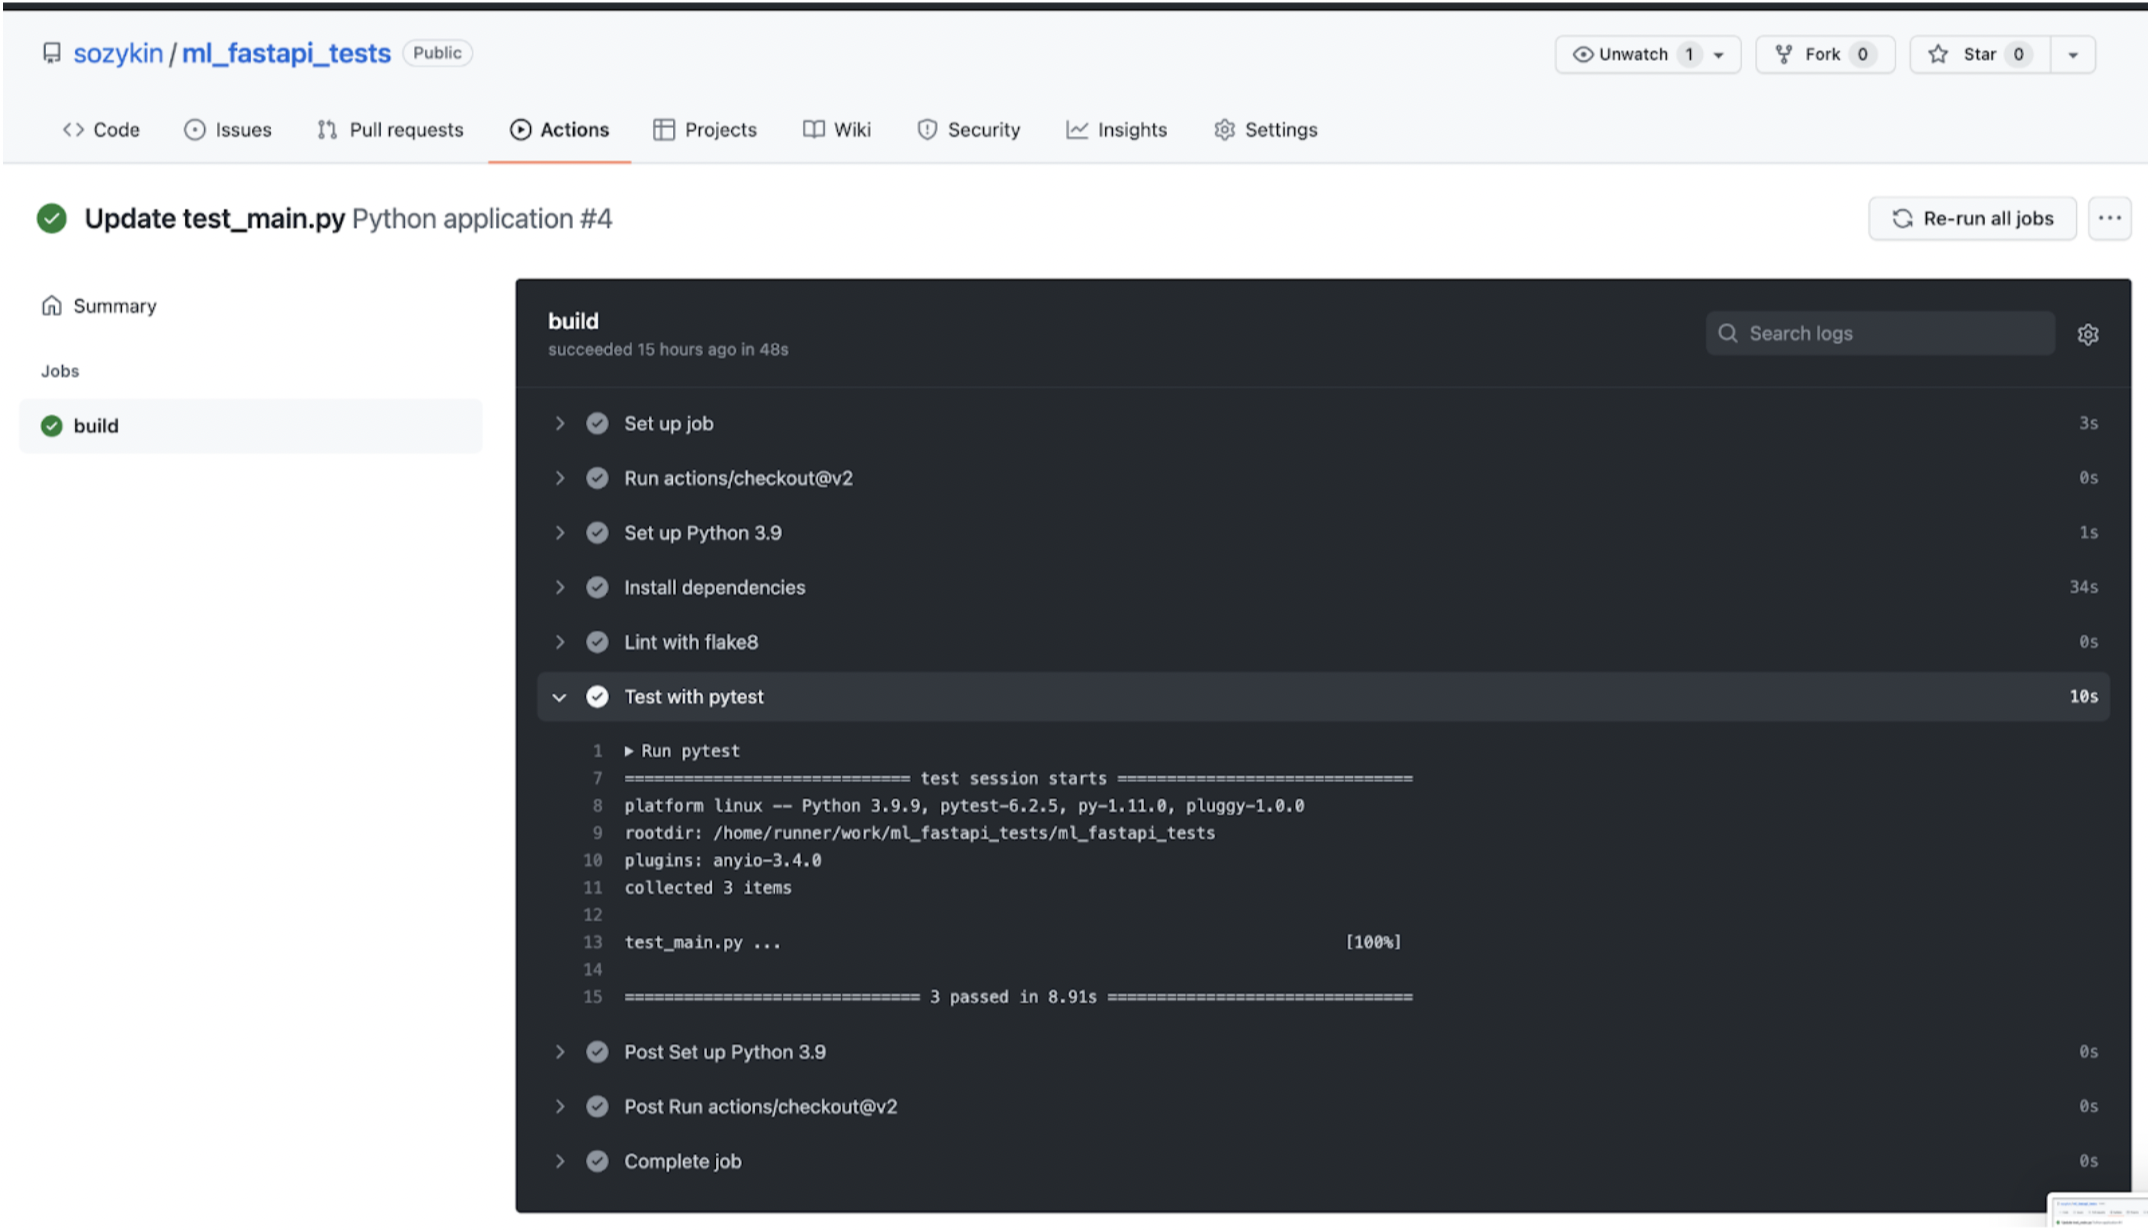

ИТОГИ:



Регулярное тестирование программного обеспечения позволяет своевременно находить ошибки в нем.

Для создания тестов на Python используется библиотека PyTest.

Тестировать API можно с помощью инструментов, встроенных в FastAPI, которые основываются на PyTest.

Исправление найденных ошибок перед развертыванием приложения для пользователей позволяет повысить стабильность работы приложения.

Практика программной инженерии Continuous Integration позволяет автоматически запускать тесты при выполнении каждого commit в репозиторий. В результате скорость обнаружения ошибок увеличивается.

GitHub предоставляет бесплатный и удобный инструмент Continuous Integration: GitHub Actions.